##### Copyright 2024 Google LLC.

In [ ]:
# @title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Multimodal analysis using
Gemini API


In [1]:
#!pip install -U -q google-generativeai # Install the Python SDK

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 kB 2.0 MB/s eta 0:00:00


In [45]:
import google.generativeai as genai

## Set up  API key



In [53]:
from google.colab import userdata
GOOGLE_API_KEY=userdata.get('GOOGLE_API_KEY')
genai.configure(api_key=GOOGLE_API_KEY)

## Run your first prompt

Use the `generate_content` method to generate responses to your prompts. You can pass text directly to generate_content, and use the `.text` property to get the text content of the response.

In [ ]:
# model = genai.GenerativeModel('gemini-1.5-flash')
# response = model.generate_content("Give me python code to sort a list")
# print(response.text)

```python
# Using the built-in sort() method
my_list = [5, 2, 8, 1, 9]
my_list.sort()
print(my_list)  # Output: [1, 2, 5, 8, 9]

# Using the sorted() function (returns a new sorted list)
my_list = [5, 2, 8, 1, 9]
sorted_list = sorted(my_list)
print(sorted_list)  # Output: [1, 2, 5, 8, 9]
print(my_list)  # Output: [5, 2, 8, 1, 9] (original list remains unchanged)

# Sorting in descending order
my_list = [5, 2, 8, 1, 9]
my_list.sort(reverse=True)
print(my_list)  # Output: [9, 8, 5, 2, 1]

# Sorting a list of tuples based on the second element
my_list = [(1, 5), (3, 2), (2, 8)]
my_list.sort(key=lambda x: x[1])
print(my_list)  # Output: [(3, 2), (1, 5), (2, 8)]
```

**Explanation:**

* **`my_list.sort()`:** This method sorts the list in place (modifies the original list).
* **`sorted(my_list)`:** This function returns a new sorted list without modifying the original list.
* **`reverse=True`:**  This argument to the `sort()` method sorts the list in descending order.
* **`key=lambda x: x[1]

## Use images in your prompt

Here you will download an image from a URL and pass that image in our prompt.

First, you download the image and load it with PIL:

In [10]:
#!pip install --upgrade pillow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 35.8 MB/s eta 0:00:00
  Attempting uninstall: pillow
    Found existing installation: Pillow 9.4.0
    Uninstalling Pillow-9.4.0:
      Successfully uninstalled Pillow-9.4.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
imageio 2.31.6 requires pillow<10.1.0,>=8.3.2, but you have pillow 10.3.0 which is incompatible.


In [47]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [49]:
!curl -o image.jpeg "https://drive.google.com/uc?export=download&id=1iYT7NnZMWeSZJBUQfl5ihKkJQHKqUGV_" --location


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 1160k  100 1160k    0     0  2423k      0 --:--:-- --:--:-- --:--:-- 29.0M


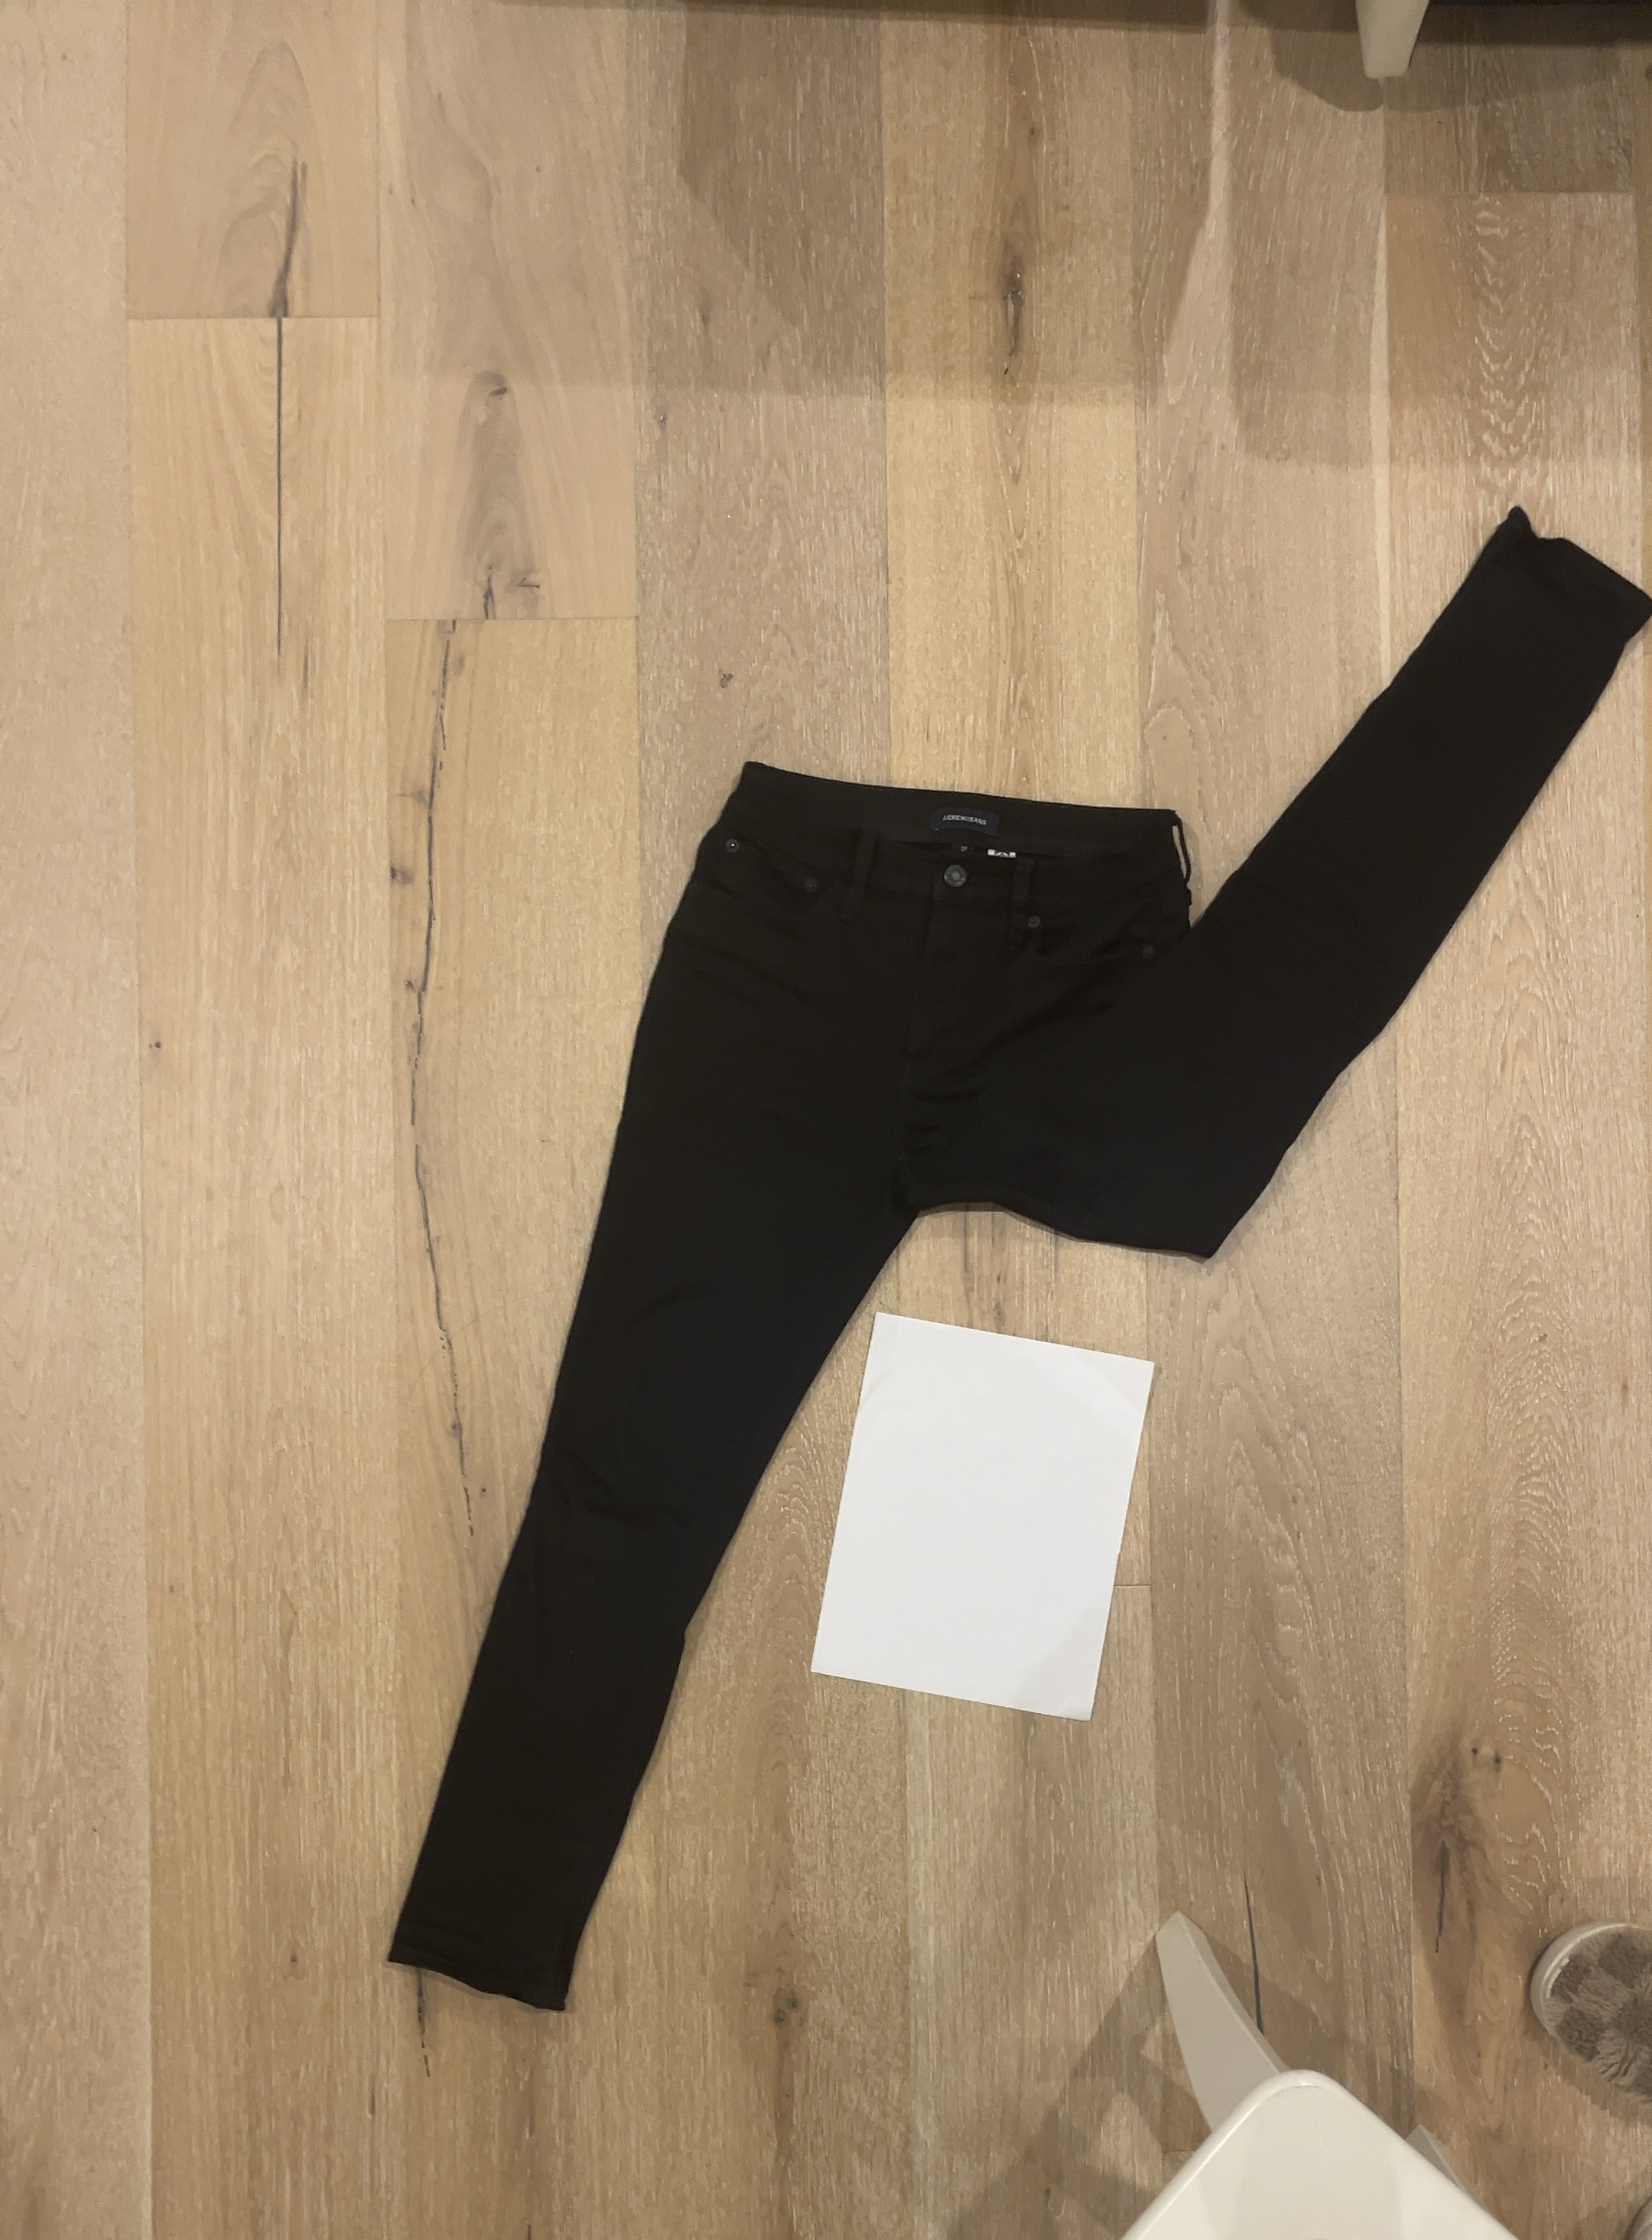

In [50]:
import PIL.Image
img = PIL.Image.open('image.jpeg')
img

In [33]:
# from google.colab.patches import cv2_imshow
# import cv2
# img = cv2.imread('image.jpg')

# # Check if the image is loaded properly
# if img is None:
#     print("Error: Image not found or could not be read")
# else:
#     # Display the image using cv2.imshow()
#     cv2.imshow('Image', img)

#     # Wait for a key press to exit
#     cv2.waitKey(0)
#     cv2.destroyAllWindows()

Error: Image not found or could not be read


In [39]:
# !ls /content

drive  image.jpeg  image.jpg  sample_data


In [40]:
# !file image.jpg

image.jpg: HTML document, ASCII text, with very long lines (17957)


In [51]:
prompt = """This image contains a pair of jeans and a letter sized paper 8.5x11. one of the legs of the jeans are folded up so that the other leg can lie flat on the floor.
Assume that camera is parallel to the floor and both jeans and paper are in the center of the field.
Use paper as reference and output width of thigh, ankle, and length of the the leg that is lying flat on the floor and not foldede up.
Assume thigh width is crotch to the side of the jeans.
"""

Then you can include the image in our prompt by just passing a list of items to `generate_content`.

In [52]:
model = genai.GenerativeModel('gemini-1.5-flash')
response = model.generate_content([prompt, img])
print(response.text)

BadRequest: 400 POST https://generativelanguage.googleapis.com/v1beta/models/gemini-1.5-flash:generateContent?%24alt=json%3Benum-encoding%3Dint: API key not valid. Please pass a valid API key.

In [54]:
!pip install genai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 817.3/817.3 kB 15.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.5/76.5 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 58.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 53.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 9.8 MB/s eta 0:00:00
  Attempting uninstall: traitlets
    Found existing installation: traitlets 5.7.1
    Uninstalling traitlets-5.7.1:
      Successfully uninstalled traitlets-5.7.1
  Attempting uninstall: ipython
    Found existing installation: ipython 7.34.0
    Uninstalling ipython-7.34.0:
      Successfully uninstalled ipython-7.34.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires ipython==7.34.0, but you have ipython 8.25.0 which is incompatible.


In [ ]:
import genai

## Have a chat

The Gemini API enables you to have freeform conversations across multiple turns.

The [ChatSession](https://ai.google.dev/api/python/google/generativeai/ChatSession) class will store the conversation history for multi-turn interactions.

In [ ]:
model = genai.GenerativeModel('gemini-1.5-flash')
chat = model.start_chat(history=[])

In [ ]:
response = chat.send_message("In one sentence, explain how a computer works to a young child.")
print(response.text)

A computer is like a super smart toy that follows instructions from you, using numbers and lights to do amazing things! 



You can see the chat history:

In [ ]:
print(chat.history)

[parts {
  text: "In one sentence, explain how a computer works to a young child."
}
role: "user"
, parts {
  text: "A computer is like a super smart toy that follows instructions from you, using numbers and lights to do amazing things! \n"
}
role: "model"
]


You can keep sending messages to continue the conversation:

In [ ]:
response = chat.send_message("Okay, how about a more detailed explanation to a high schooler?")
print(response.text)

## Set the temperature

Every prompt you send to the model includes parameters that control how the model generates responses. Use a `genai.GenerationConfig` to set these, or omit it to use the defaults.

Temperature controls the degree of randomness in token selection. Use higher values for more creative responses, and lower values for more deterministic responses.

You can set the `generation_config` when creating the model.

In [ ]:
model = genai.GenerativeModel(
    'gemini-1.5-flash',
    generation_config=genai.GenerationConfig(
        max_output_tokens=2000,
        temperature=0.9,
    ))

Or, set the `generation_config` on an individual call to `generate_content`. Any values set there override values on the model constructor.

Note: Although you can set the `candidate_count` in the generation_config, gemini-pro models will only return a single candidate at the this time.

In [ ]:
response = model.generate_content(
    'Give me a numbered list of cat facts.',
    # Limit to 5 facts.
    generation_config = genai.GenerationConfig(stop_sequences=['\n6'])
)

In [ ]:
print(response.text)

## Learn more

There's lots more to learn!

* For more fun prompts, check out [Market a Jetpack](https://github.com/google-gemini/cookbook/blob/main/examples/Market_a_Jet_Backpack.ipynb).
* Check out the [safety quickstart](https://github.com/google-gemini/cookbook/blob/main/quickstarts/Safety.ipynb) next to learn about the Gemini API's configurable safety settings, and what to do if your prompt is blocked.
* For lots more details on using the Python SDK, check out this [detailed quickstart](https://ai.google.dev/tutorials/python_quickstart).